In [813]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency
from fanalysis.ca import CA
from collections import Counter
from math import sqrt

# Importation des données

In [814]:
data=pd.read_excel('Blue Island 2018-2020.xlsx')

In [815]:
data_g=pd.read_excel('gender_site.xlsx')

In [816]:
data_u=pd.read_excel('urbanisation.xlsx')

In [817]:
df_product_gender= pd.read_csv(r"train 2.csv")

In [818]:
df=data.copy()

In [819]:
df_g=data_g.copy()

In [820]:
df_u=data_u.copy()

# Description des données

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_order             2964 non-null   int64         
 1   date_add             2964 non-null   datetime64[ns]
 2   id_customer          2964 non-null   int64         
 3   firstname            2964 non-null   object        
 4   lastname             2964 non-null   object        
 5   email                2964 non-null   object        
 6   birthday             2964 non-null   object        
 7   address1             2964 non-null   object        
 8   address2             701 non-null    object        
 9   postcode             2964 non-null   int64         
 10  city                 2964 non-null   object        
 11  phone                1272 non-null   object        
 12  phone_mobile         2930 non-null   object        
 13  product_id           2964 non-nul

In [822]:
df.replace({'0000-00-00': np.nan},inplace=True)

In [823]:
df['firstname'] = df['firstname'].astype('string')
df['lastname'] = df['lastname'].astype('string')
df['email'] = df['email'].astype('string')
df['birthday'] = pd.to_datetime(df['birthday'])
df['postcode']=df['postcode'].astype(int)
df['product_id']= df['product_id'].astype(int)
df['product_name']= df['product_name'].astype('string')
df['product_price']= df['product_price'].astype(float)
df['reduction_percent']= df['reduction_percent'].astype(float)
df['product_quantity']= df['product_quantity'].astype(float)
df['unit_price_tax_incl']= df['unit_price_tax_incl'].astype(float)
df['total panier']= df['total panier'].astype(float)

# Préparation et nettoyage des données

# Sélection des données

In [824]:
df.drop(columns=['email','address1','address2','city','phone','phone_mobile','size','color'],inplace=True)

# Nettoyage des données

# Données manquantes

In [825]:
df.isnull().sum()

id_order                 0
date_add                 0
id_customer              0
firstname                0
lastname                 0
birthday               194
postcode                 0
product_id               0
product_name             0
product_price            0
reduction_percent        0
product_quantity         0
unit_price_tax_incl      0
total panier             0
griffe                   1
dtype: int64

In [826]:
df['birthday'].fillna((df['birthday'].mean()), inplace=True)

In [827]:
def age_calcul(date1,date2):
    return date1.year - date2.year

In [828]:
df['age'] = df.apply(lambda x: age_calcul(x.date_add,x.birthday), axis=1)

In [829]:
df['age'].max()

120

In [830]:
df['age'].min()

1

# Outliers

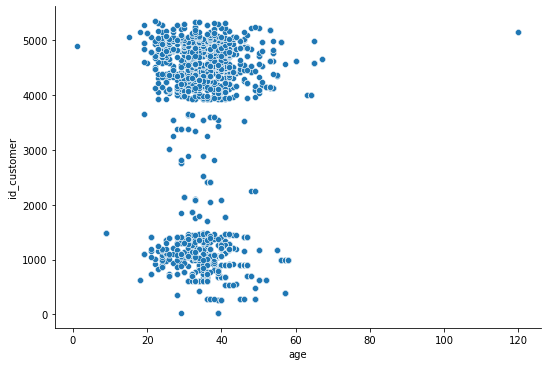

In [831]:
sns.relplot(x='age',y='id_customer',data=df,height=5,aspect=1.5)

In [832]:
q1=df["age"].quantile(q=0.25)
q3=df["age"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
df.loc[df.age>borne_sup,'age']=df["age"].mean()
df.loc[df.age<borne_inf,'age']=df["age"].mean()
#df= df[df["age"]<borne_sup]
#df=df[df["age"]>borne_inf]

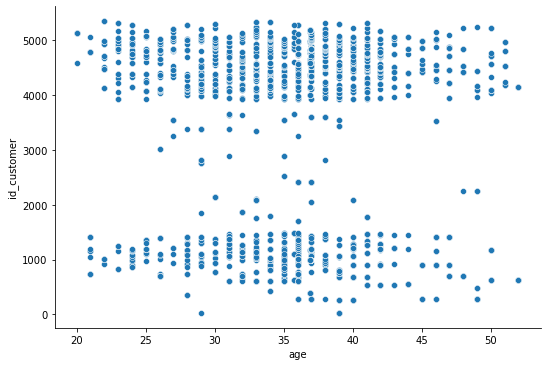

In [833]:
sns.relplot(x='age',y='id_customer',data=df,height=5,aspect=1.5)

In [834]:
df['age'].max()


52.0

In [835]:
df

,id_order,date_add,id_customer,firstname,lastname,birthday,postcode,product_id,product_name,product_price,reduction_percent,product_quantity,unit_price_tax_incl,total panier,griffe,age
0,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1381,PULL HOMME,79.9,0.0,1.0,79.9,79.9,BLUE ISLAND,35.0
1,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1348,PANTALON SLIM FIT HOMME,89.9,0.0,1.0,89.9,89.9,BLUE ISLAND,35.0
2,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1397,PARKA HOMME,269.9,0.0,1.0,269.9,269.9,BLUE ISLAND,34.0
3,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1344,MANTEAU HOMME,289.9,0.0,1.0,289.9,289.9,BLUE ISLAND,34.0
4,181,2018-01-05 20:18:07,898,Mejed,Trabelsi,1994-12-14 00:00:00.000000000,7000,1341,COSTUME HOMME,329.0,0.0,1.0,329.0,329.0,BLUE ISLAND,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1746,2020-12-31 02:46:56,1060,Amjed,Abaidi,1980-08-29 00:00:00.000000000,1200,3112,PARKA HOMME,289.0,0.0,1.0,289.0,289.0,BLUE ISLAND,40.0
2960,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3042,PARKA HOMME,289.0,0.0,1.0,289.0,289.0,BLUE ISLAND,22.0
2961,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3021,BLOUSON HOMME,269.0,0.0,1.0,269.0,269.0,BLUE ISLAND,22.0
2962,1749,2020-12-31 23:58:57,606,Mohamed,Arroum,1987-07-02 00:00:00.000000000,6080,3055,PULL HOMME,89.9,0.0,1.0,89.9,89.9,ISLD,33.0


# Split Product

In [836]:
df['product'], df['PN'] = df['product_name'].str.split(' ', 1).str

<ipython-input-836-3046be1aa850>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['product'], df['PN'] = df['product_name'].str.split(' ', 1).str


In [837]:
df.drop(columns=["PN"],inplace=True)

In [838]:
df['product']=df['product'].str.upper()

In [839]:
new_all = df[df['id_order'].duplicated(keep=False)]

In [840]:
new_all['Product_Bundle']=new_all.groupby('id_order')['product'].transform(lambda x: ','.join(x))

<ipython-input-840-b5affff9ff3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_all['Product_Bundle']=new_all.groupby('id_order')['product'].transform(lambda x: ','.join(x))


In [841]:
new_all=new_all[['id_order','Product_Bundle']].drop_duplicates()

In [842]:
new_all

,id_order,Product_Bundle
0,179,"PULL,PANTALON"
2,180,"PARKA,MANTEAU"
4,181,"COSTUME,MANTEAU"
6,182,"CHEMISE,CHEMISE"
8,183,"PANTALON,PANTALON"
...,...,...
2954,1744,"PULL,PULL"
2956,1745,"CALECON,CEINTURE"
2958,1746,"PARKA,PARKA"
2960,1748,"PARKA,BLOUSON"


In [843]:
#importing libraries
from itertools import combinations
from collections import Counter

count=Counter()

for row in new_all['Product_Bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))      #counting all the 2 products bundle
print (count)

Counter({('PANTALON', 'PANTALON'): 256, ('TEE-SHIRT', 'TEE-SHIRT'): 202, ('CHEMISE', 'CHEMISE'): 183, ('PULL', 'PULL'): 161, ('POLO', 'POLO'): 147, ('POLO', 'TEE-SHIRT'): 79, ('CHEMISE', 'PANTALON'): 76, ('PANTALON', 'POLO'): 75, ('POLO', 'PANTALON'): 66, ('PANTALON', 'CHEMISE'): 62, ('TEE-SHIRT', 'POLO'): 61, ('PANTALON', 'TEE-SHIRT'): 45, ('PULL', 'PANTALON'): 44, ('BERMUDA', 'POLO'): 38, ('TEE-SHIRT', 'PANTALON'): 37, ('CHEMISE', 'TEE-SHIRT'): 37, ('CHEMISE', 'POLO'): 28, ('SWEAT', 'SWEAT'): 27, ('PANTALON', 'PULL'): 26, ('POLO', 'CHEMISE'): 25, ('TEE-SHIRT', 'BERMUDA'): 25, ('PANTALON', 'ESPADRILLE'): 25, ('PANTALON', 'CHAUSSURES'): 24, ('ENSEMBLE', 'TEE-SHIRT'): 24, ('CHAUSSURES', 'CHAUSSURES'): 23, ('ENSEMBLE', 'ENSEMBLE'): 22, ('ESPADRILLE', 'ESPADRILLE'): 21, ('ENSEMBLE', 'POLO'): 20, ('POLO', 'BERMUDA'): 19, ('BERMUDA', 'TEE-SHIRT'): 18, ('ESPADRILLE', 'PANTALON'): 18, ('POLO', 'ESPADRILLE'): 16, ('CHAUSSURES', 'TEE-SHIRT'): 15, ('BERMUDA', 'BERMUDA'): 15, ('CHEMISE', 'CHAUSSU

In [844]:
df_product = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_product

,index,0
0,"(PULL, PANTALON)",44
1,"(PARKA, MANTEAU)",1
2,"(COSTUME, MANTEAU)",1
3,"(CHEMISE, CHEMISE)",183
4,"(PANTALON, PANTALON)",256
...,...,...
217,"(PULL, VESTE)",1
218,"(PARKA, VESTE)",2
219,"(CRAVATTE, CRAVATTE)",1
220,"(VESTE, CHAUSSURES)",1


In [845]:
df_product = df_product.rename(columns={'index':'Products', 0:'Transactions'})

In [846]:
df_product

,Products,Transactions
0,"(PULL, PANTALON)",44
1,"(PARKA, MANTEAU)",1
2,"(COSTUME, MANTEAU)",1
3,"(CHEMISE, CHEMISE)",183
4,"(PANTALON, PANTALON)",256
...,...,...
217,"(PULL, VESTE)",1
218,"(PARKA, VESTE)",2
219,"(CRAVATTE, CRAVATTE)",1
220,"(VESTE, CHAUSSURES)",1


In [847]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Products      222 non-null    object
 1   Transactions  222 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [848]:
df_product["Products"]=df_product["Products"].apply(str)

In [849]:
df_product['product1'], df_product['product2'] = df_product['Products'].str.split(',', 1).str

<ipython-input-849-57e0a272d4ec>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_product['product1'], df_product['product2'] = df_product['Products'].str.split(',', 1).str


In [850]:
df_product

,Products,Transactions,product1,product2
0,"('PULL', 'PANTALON')",44,('PULL','PANTALON')
1,"('PARKA', 'MANTEAU')",1,('PARKA','MANTEAU')
2,"('COSTUME', 'MANTEAU')",1,('COSTUME','MANTEAU')
3,"('CHEMISE', 'CHEMISE')",183,('CHEMISE','CHEMISE')
4,"('PANTALON', 'PANTALON')",256,('PANTALON','PANTALON')
...,...,...,...,...
217,"('PULL', 'VESTE')",1,('PULL','VESTE')
218,"('PARKA', 'VESTE')",2,('PARKA','VESTE')
219,"('CRAVATTE', 'CRAVATTE')",1,('CRAVATTE','CRAVATTE')
220,"('VESTE', 'CHAUSSURES')",1,('VESTE','CHAUSSURES')


In [851]:
df_product['product1'] = df_product['product1'].str.replace("'",'')
df_product['product1'] = df_product['product1'].str.replace("(",'')
df_product['product2'] = df_product['product2'].str.replace("'",'')
df_product['product2'] = df_product['product2'].str.replace(")",'')


In [852]:
df_product

,Products,Transactions,product1,product2
0,"('PULL', 'PANTALON')",44,PULL,PANTALON
1,"('PARKA', 'MANTEAU')",1,PARKA,MANTEAU
2,"('COSTUME', 'MANTEAU')",1,COSTUME,MANTEAU
3,"('CHEMISE', 'CHEMISE')",183,CHEMISE,CHEMISE
4,"('PANTALON', 'PANTALON')",256,PANTALON,PANTALON
...,...,...,...,...
217,"('PULL', 'VESTE')",1,PULL,VESTE
218,"('PARKA', 'VESTE')",2,PARKA,VESTE
219,"('CRAVATTE', 'CRAVATTE')",1,CRAVATTE,CRAVATTE
220,"('VESTE', 'CHAUSSURES')",1,VESTE,CHAUSSURES


In [853]:
df_product.drop(df_product.loc[df_product['product1']==df_product['product2']].index, inplace=True)

In [854]:
product_list = df["product"].unique().tolist()

In [855]:
product_list

['PULL',
 'PANTALON',
 'PARKA',
 'MANTEAU',
 'COSTUME',
 'CHEMISE',
 'GILET',
 'TEE-SHIRT',
 'CHAUSSURES',
 'SWEAT',
 'VESTE',
 'POLO',
 'BLOUSON',
 'DOUDOUNE',
 'TUNIQUE',
 'CHAUSSURE',
 'PACK',
 'MULE',
 'ENSEMBLE',
 'BOXER',
 'ESPADRILLE',
 'SAC',
 'BERMUDA',
 'PANTACOURT',
 'DEBARDEUR',
 'CEINTURE',
 'BAS',
 'CALECON',
 'TRENCH',
 'CRAVATTE']

In [856]:
df_combin = pd.DataFrame(columns=product_list, index=product_list)

In [857]:
df_combin

,PULL,PANTALON,PARKA,MANTEAU,COSTUME,CHEMISE,GILET,TEE-SHIRT,CHAUSSURES,SWEAT,...,ESPADRILLE,SAC,BERMUDA,PANTACOURT,DEBARDEUR,CEINTURE,BAS,CALECON,TRENCH,CRAVATTE
PULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANTALON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PARKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MANTEAU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COSTUME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEMISE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GILET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEE-SHIRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAUSSURES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWEAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Construction des données

# Ajout de la colonne gender

In [858]:
key_gender =df_product_gender.set_index('mots cles')["gender"].to_dict()

In [859]:
def get_product_gender(product_name):
    for name in product_name.split() :
        if name in key_gender.keys():
            return str(key_gender[name])
    return '-'

In [860]:
def word2vec(word):
    # Count the number of characters in each word.
    count_characters = Counter(word)
    # Gets the set of characters and calculates the "length" of the vector.
    set_characters = set(count_characters)
    length = sqrt(sum(c*c for c in count_characters.values()))
    return count_characters, set_characters, length, word

In [861]:
def cosine_similarity(vector1, vector2, ndigits):
    # Get the common characters between the two character sets
    common_characters = vector1[1].intersection(vector2[1])
    # Sum of the product of each intersection character.
    product_summation = sum(vector1[0][character] * vector2[0][character] for character in common_characters)
    # Gets the length of each vector from the word2vec output.
    length = vector1[2] * vector2[2]
    # Calculates cosine similarity and rounds the value to ndigits decimal places.
    if length == 0:
        # Set value to 0 if word is empty.
        similarity = 0
    else:
        similarity = round(product_summation/length, ndigits)
    return similarity

In [862]:
vector_list = [word2vec(str(i)) for i in df_g['firstname'].unique()]

In [863]:
def find_similar(vector_list,request_word,threshold):
    # Initiate an empty list to store results.
    results_list = []
    # Two loops to compare each vector with another vector only once.
    vector2= word2vec(str(request_word))
    max_similarity = 0 
    similar_word = None
    for i in range(len(vector_list)):
        vector1 = vector_list[i]
        # Calculate cosine similarity
        similarity_score = cosine_similarity(vector1, vector2, 3)
        # Append to results list if similarity score is between 1 and the threshold.
        # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
        if similarity_score> threshold :
            if 1 >= similarity_score>=  max_similarity:
                max_similarity = similarity_score
                similar_word = vector1
    if max_similarity>0 :
        return similar_word[3], max_similarity
    return None,0

In [864]:
#generating genders from firstnames and lastnames
#if not, then from "product-name"
'''def get_gender(firstname,lastname,product_name, train):
    similar_firstname , similarity_score_firstname = find_similar(vector_list,firstname,0.5)
    similar_lastname , similarity_score_lastname = find_similar(vector_list,lastname,0.5)
    if similarity_score_firstname > 0 :
      gender_firstname=str(train[train['firstname']== str(similar_firstname)]["genre"].values[0])
      if similarity_score_lastname> 0 :
        gender_lastname= str(train[train['firstname']== str(similar_lastname)]["genre"].values[0])
        if gender_firstname!=gender_lastname : 
          if similarity_score_firstname>= similarity_score_lastname :
            return gender_firstname
          else :
            return gender_lastname
        else:
          return gender_firstname
    elif similarity_score_lastname> 0:
      gender_lastname= str(train[train['firstname']== str(similar_lastname)]["genre"].values[0])
      return gender_lastname
    else :
      return get_product_gender(product_name)'''


'def get_gender(firstname,lastname,product_name, train):\n    similar_firstname , similarity_score_firstname = find_similar(vector_list,firstname,0.5)\n    similar_lastname , similarity_score_lastname = find_similar(vector_list,lastname,0.5)\n    if similarity_score_firstname > 0 :\n      gender_firstname=str(train[train[\'firstname\']== str(similar_firstname)]["genre"].values[0])\n      if similarity_score_lastname> 0 :\n        gender_lastname= str(train[train[\'firstname\']== str(similar_lastname)]["genre"].values[0])\n        if gender_firstname!=gender_lastname : \n          if similarity_score_firstname>= similarity_score_lastname :\n            return gender_firstname\n          else :\n            return gender_lastname\n        else:\n          return gender_firstname\n    elif similarity_score_lastname> 0:\n      gender_lastname= str(train[train[\'firstname\']== str(similar_lastname)]["genre"].values[0])\n      return gender_lastname\n    else :\n      return get_product_gend

In [865]:
#defining the scores of each name
def get_score(firstname,lastname, train):
  try:
    similar_firstname , similarity_score_firstname = find_similar(vector_list,firstname,0.5)
    similar_lastname , similarity_score_lastname = find_similar(vector_list,lastname,0.5)
    if similarity_score_firstname > 0 :
      if similarity_score_lastname> 0 :
        return max(similarity_score_firstname,similarity_score_lastname)
    elif similarity_score_lastname> 0:
      return similarity_score_lastname
    else :
      return 0.5
  except Exception as e :
    print (e)

In [866]:
df["firstname"]=df["firstname"].apply(str)
df["lastname"]=df["lastname"].apply(str)
df["product_name"]=df["product_name"].apply(str)

In [867]:
'''df['gender'] = df.apply(lambda x: get_gender(x.firstname, x.lastname,x.product_name,df_g), axis=1)
df["score"]=df.apply( lambda x: get_score(x.firstname, x.lastname,df_g), axis=1)'''

'df[\'gender\'] = df.apply(lambda x: get_gender(x.firstname, x.lastname,x.product_name,df_g), axis=1)\ndf["score"]=df.apply( lambda x: get_score(x.firstname, x.lastname,df_g), axis=1)'

In [868]:
#df[df["score"]>0.9][df["score"]<1].tail(50)

In [869]:
#0.6

In [870]:
df.isnull().sum()

id_order               0
date_add               0
id_customer            0
firstname              0
lastname               0
birthday               0
postcode               0
product_id             0
product_name           0
product_price          0
reduction_percent      0
product_quantity       0
unit_price_tax_incl    0
total panier           0
griffe                 1
age                    0
product                0
dtype: int64

In [871]:
def get_gender(firstname,lastname, train):
  try:
    if str(firstname) in train['firstname'].unique():
      return str(train[train['firstname']== str(firstname)]["genre"].values[0])
    elif str(lastname) in train['lastname'].unique():
      return str(train[train['lastname']== str(lastname)]["genre"].values[0])
    else :
      return get_product_gender(product_name)
  except Exception :
    print (str(firstname))

In [872]:
df['gender'] = df.apply(lambda x: get_gender(x.firstname,x.lastname,df_g), axis=1)

# Ajout de la colonne region

In [873]:
df["postcode"]=df["postcode"].apply(str)
df_u["code_postal"]=df_u["code_postal"].apply(str)

In [874]:
def get_region(code, train):
  try:
    if str(code) in str(train['code_postal'].unique()):
        return str(train[train['code_postal']== str(code)]['Orientation'].values[0])
  except Exception :
    print (str(code))

In [875]:
df['region'] = df.apply(lambda x: get_region(x.postcode, df_u), axis=1)

# Ajout de la colonne area

In [876]:
def get_area(code, train):
  try:
    if str(code) in str(train['code_postal'].unique()):
       return str(train[train['code_postal']== str(code)]['Zone'].values[0])
  except Exception :
    print (str(code))

In [877]:
df['area'] = df.apply(lambda x: get_area(x.postcode, df_u), axis=1)

# Ajout de la colonne class

In [878]:
cut_class = ['A', 'B', 'C+','C-', 'D', 'E']
cut_bins =[0, 2, 8, 18, 26, 42, 55]
df_u['class'] = pd.cut(df_u['Poverty rate'], bins=cut_bins, labels = cut_class)
df_u

,code_postal,Délégation,Gouvernorat,Orientation,Zone,Poverty rate,class
0,2020,Sidi Thabet,Ariana,Grand-Tunis,urbaine,9.1,C+
1,2022,Kalaat Landlous,Ariana,Grand-Tunis,urbaine,12.5,C+
2,2027,Ariana Ville,Ariana,Grand-Tunis,urbaine,1.3,A
3,2032,Sidi Thabet,Ariana,Grand-Tunis,urbaine,9.1,C+
4,2035,La Soukra,Ariana,Grand-Tunis,urbaine,1.4,A
...,...,...,...,...,...,...,...
1026,2091,ARIANA,Ariana,Grand-Tunis,urbaine,1.5,A
1027,1013,Menzah9,Ariana,Grand-Tunis,urbaine,1.6,A
1028,1063,Tunis,Tunis,Grand-Tunis,urbaine,0.2,A
1029,1013,Tunis,Tunis,Grand-Tunis,urbaine,0.2,A


In [879]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_postal   1031 non-null   object  
 1    Délégation   1031 non-null   object  
 2   Gouvernorat   1031 non-null   object  
 3   Orientation   1031 non-null   object  
 4   Zone          1031 non-null   object  
 5   Poverty rate  1031 non-null   float64 
 6   class         1031 non-null   category
dtypes: category(1), float64(1), object(5)
memory usage: 49.7+ KB


In [880]:
def get_class(code, train):
  try:
    if str(code) in str(train['code_postal'].unique()):
      return str(train[train['code_postal']== str(code)]['class'].values[0])
  except Exception :
    print (str(code))

In [881]:
df['class'] = df.apply(lambda x: get_class(x.postcode, df_u), axis=1)

In [882]:
df

,id_order,date_add,id_customer,firstname,lastname,birthday,postcode,product_id,product_name,product_price,...,product_quantity,unit_price_tax_incl,total panier,griffe,age,product,gender,region,area,class
0,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1381,PULL HOMME,79.9,...,1.0,79.9,79.9,BLUE ISLAND,35.0,PULL,Homme,Sud-Est,urbaine,C+
1,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1348,PANTALON SLIM FIT HOMME,89.9,...,1.0,89.9,89.9,BLUE ISLAND,35.0,PANTALON,Homme,Sud-Est,urbaine,C+
2,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1397,PARKA HOMME,269.9,...,1.0,269.9,269.9,BLUE ISLAND,34.0,PARKA,Homme,Grand-Tunis,urbaine,B
3,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1344,MANTEAU HOMME,289.9,...,1.0,289.9,289.9,BLUE ISLAND,34.0,MANTEAU,Homme,Grand-Tunis,urbaine,B
4,181,2018-01-05 20:18:07,898,Mejed,Trabelsi,1994-12-14 00:00:00.000000000,7000,1341,COSTUME HOMME,329.0,...,1.0,329.0,329.0,BLUE ISLAND,24.0,COSTUME,Femme,Nord-Est,urbaine,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1746,2020-12-31 02:46:56,1060,Amjed,Abaidi,1980-08-29 00:00:00.000000000,1200,3112,PARKA HOMME,289.0,...,1.0,289.0,289.0,BLUE ISLAND,40.0,PARKA,Homme,Centre-Ouest,urbaine,C-
2960,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3042,PARKA HOMME,289.0,...,1.0,289.0,289.0,BLUE ISLAND,22.0,PARKA,Homme,Nord-Ouest,urbaine,C-
2961,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3021,BLOUSON HOMME,269.0,...,1.0,269.0,269.0,BLUE ISLAND,22.0,BLOUSON,Homme,Nord-Ouest,urbaine,C-
2962,1749,2020-12-31 23:58:57,606,Mohamed,Arroum,1987-07-02 00:00:00.000000000,6080,3055,PULL HOMME,89.9,...,1.0,89.9,89.9,ISLD,33.0,PULL,Homme,Sud-Est,urbaine,C-


# Calcul ticket

In [883]:
group1 = df['product_quantity'].groupby(df['id_order']).transform('sum')

In [884]:
df['total_quantity'] = group1

In [885]:
group2=df['total panier'].groupby(df['id_order']).transform('sum')

In [886]:
df['total_basket'] = group2

# Transformations des donées

In [887]:
max_age=df['age'].max()
min_age=df['age'].min()

In [888]:
cut_age = ['-30 ans', "30-35ans", '35-40ans', '+40ans']
cut_bins =[min_age, 30, 35, 40, max_age]
df['age_segment'] = pd.cut(df['age'], bins=cut_bins, labels = cut_age)

In [889]:
max_discount=df['reduction_percent'].max()
min_discount=df['reduction_percent'].min()

In [890]:
cut_discount = ['no discount' ,"30% and less", '40% - 50%', 'more than 60%']
cut_bins =[-1,min_discount, 30, 50, max_discount]
df['discount_segment'] = pd.cut(df['reduction_percent'], bins=cut_bins, labels = cut_discount, ordered=False)

In [891]:
max_qte=df['total_quantity'].max()
min_qte=df['total_quantity'].min()

In [892]:
cut_qte = ['1 piece', "2 pieces", '3-5 pieces', '6-10 pieces', 'more than 10 pieces']
cut_bins =[-1,min_qte, 2, 5, 10, max_qte ]
df['piece_segment'] = pd.cut(df['total_quantity'], bins=cut_bins, labels = cut_qte)

In [893]:
max_v=df['total_basket'].max()
min_v=df['total_basket'].min()

In [894]:
cut_basket = ['less than 100DT', "100DT - 200DT", 'more than 200DT']
cut_bins =[min_v, 100,200,max_v ]
df['Basket_value'] = pd.cut(df['total_basket'], bins=cut_bins, labels = cut_basket)

In [895]:
cut_day = ['Start of month', "Middle of month", 'End of month']
cut_bins =[1, 10, 20, 31]
df['period of month'] = pd.cut(df['date_add'].dt.day , bins=cut_bins, labels = cut_day)

In [896]:
cut_time = ['Early_morning', "Late_morning", 'Early_afternoon','Late_afternoon','Evening','Night']
cut_bins =[0, 8, 11, 14, 17, 20, 23]
df['purchase time'] = pd.cut(df['date_add'].dt.hour , bins=cut_bins, labels = cut_time)

In [897]:
cut_season_2 = ["winter","spring",'summer', "autumn","winter"]
cut_bins =[0, 3 ,5,8,11,13]
df['season'] = pd.cut(df['date_add'].dt.month , bins=cut_bins, labels = cut_season_2, ordered=False)

# DATA TICKET

In [898]:
df_ticket=df.copy()

In [899]:
df_ticket.drop(columns=['product_id','product_name','product_price','discount_segment',
                        'reduction_percent','total panier','product_quantity',
                                 'unit_price_tax_incl','griffe'],inplace=True)

In [900]:
df_ticket.drop_duplicates(keep = 'first', inplace=True)

In [901]:
df_ticket

,id_order,date_add,id_customer,firstname,lastname,birthday,postcode,age,product,gender,...,area,class,total_quantity,total_basket,age_segment,piece_segment,Basket_value,period of month,purchase time,season
0,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,35.0,PULL,Homme,...,urbaine,C+,2.0,169.8,30-35ans,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
1,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,35.0,PANTALON,Homme,...,urbaine,C+,2.0,169.8,30-35ans,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
2,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,34.0,PARKA,Homme,...,urbaine,B,2.0,559.8,30-35ans,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
3,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,34.0,MANTEAU,Homme,...,urbaine,B,2.0,559.8,30-35ans,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
4,181,2018-01-05 20:18:07,898,Mejed,Trabelsi,1994-12-14 00:00:00.000000000,7000,24.0,COSTUME,Femme,...,urbaine,B,2.0,618.9,-30 ans,2 pieces,more than 200DT,Start of month,Evening,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,1745,2020-12-30 22:54:34,4075,Ghaouth,Medsia,1989-01-26 00:00:00.000000000,2100,31.0,CEINTURE,Homme,...,urbaine,C+,2.0,116.8,30-35ans,2 pieces,100DT - 200DT,End of month,Night,winter
2958,1746,2020-12-31 02:46:56,1060,Amjed,Abaidi,1980-08-29 00:00:00.000000000,1200,40.0,PARKA,Homme,...,urbaine,C-,2.0,578.0,35-40ans,2 pieces,more than 200DT,End of month,Early_morning,winter
2960,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,22.0,PARKA,Homme,...,urbaine,C-,2.0,558.0,-30 ans,2 pieces,more than 200DT,End of month,Early_afternoon,winter
2961,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,22.0,BLOUSON,Homme,...,urbaine,C-,2.0,558.0,-30 ans,2 pieces,more than 200DT,End of month,Early_afternoon,winter


# Analyse des données

# Analyse univariée de Comportement des clients

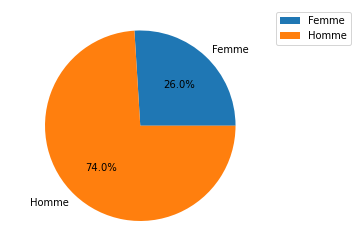

In [902]:
gender = pd.crosstab(df.gender, " ")
gender.plot.pie(subplots=True, figsize = (5, 5), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

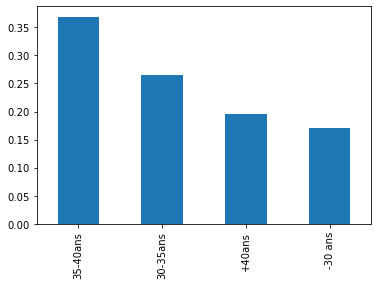

In [903]:
# Diagramme en tuyaux d'orgues
df["age_segment"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [904]:
df

,id_order,date_add,id_customer,firstname,lastname,birthday,postcode,product_id,product_name,product_price,...,class,total_quantity,total_basket,age_segment,discount_segment,piece_segment,Basket_value,period of month,purchase time,season
0,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1381,PULL HOMME,79.9,...,C+,2.0,169.8,30-35ans,no discount,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
1,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1348,PANTALON SLIM FIT HOMME,89.9,...,C+,2.0,169.8,30-35ans,no discount,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
2,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1397,PARKA HOMME,269.9,...,B,2.0,559.8,30-35ans,no discount,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
3,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1344,MANTEAU HOMME,289.9,...,B,2.0,559.8,30-35ans,no discount,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
4,181,2018-01-05 20:18:07,898,Mejed,Trabelsi,1994-12-14 00:00:00.000000000,7000,1341,COSTUME HOMME,329.0,...,B,2.0,618.9,-30 ans,no discount,2 pieces,more than 200DT,Start of month,Evening,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1746,2020-12-31 02:46:56,1060,Amjed,Abaidi,1980-08-29 00:00:00.000000000,1200,3112,PARKA HOMME,289.0,...,C-,2.0,578.0,35-40ans,no discount,2 pieces,more than 200DT,End of month,Early_morning,winter
2960,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3042,PARKA HOMME,289.0,...,C-,2.0,558.0,-30 ans,no discount,2 pieces,more than 200DT,End of month,Early_afternoon,winter
2961,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3021,BLOUSON HOMME,269.0,...,C-,2.0,558.0,-30 ans,no discount,2 pieces,more than 200DT,End of month,Early_afternoon,winter
2962,1749,2020-12-31 23:58:57,606,Mohamed,Arroum,1987-07-02 00:00:00.000000000,6080,3055,PULL HOMME,89.9,...,C-,2.0,179.8,30-35ans,no discount,2 pieces,100DT - 200DT,End of month,Night,winter


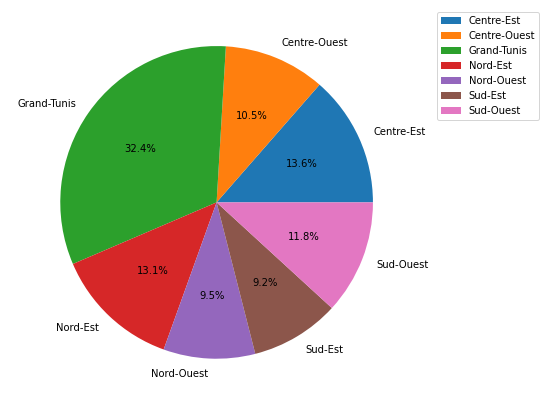

In [905]:
region= pd.crosstab(df.region, " ")
region.plot.pie(subplots=True, figsize = (7, 6), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

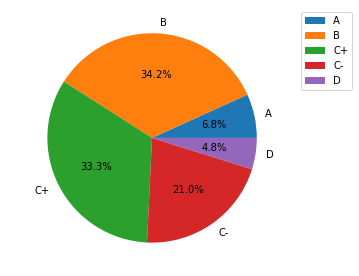

In [906]:
classe= pd.crosstab(df['class'], " ")
classe.plot.pie(subplots=True, figsize = (5, 5), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

array([<AxesSubplot:ylabel=' '>], dtype=object)

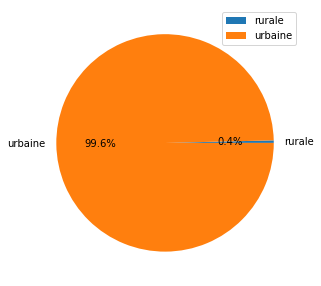

In [907]:
area= pd.crosstab(df['area'], " ")
area.plot.pie(subplots=True, figsize = (5, 5), autopct='%1.1f%%')

# AFC

In [908]:
pip install fanalysis

# AFC Remise/Comportement client

In [926]:
table=pd.crosstab(df['discount_segment'], df['region'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 101.83086601275139
p_valeur: 1.0219564319565774e-13
degré de liberté: 18


In [927]:
X = "discount_segment"
Y = "region"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [928]:
cont

region,Centre-Est,Centre-Ouest,Grand-Tunis,Nord-Est,Nord-Ouest,Sud-Est,Sud-Ouest
discount_segment,,,,,,,
no discount,129,88,362,107,68,91,115
30% and less,63,61,271,108,67,66,73
40% - 50%,106,90,212,106,98,79,98
more than 60%,104,72,115,66,48,37,64


In [929]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=Index(['Centre-Est', 'Centre-Ouest', 'Grand-Tunis', 'Nord-Est', 'Nord-Ouest',
       'Sud-Est', 'Sud-Ouest'],
      dtype='object', name='region'),
   row_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'))

In [930]:
#affichage des valeurs propres
print(afc.eig_)

[[2.54701076e-02 7.45254317e-03 1.43324199e-03]
 [7.41360668e+01 2.16921831e+01 4.17175011e+00]
 [7.41360668e+01 9.58282499e+01 1.00000000e+02]]


In [931]:
#informations sur les modalités lignes
print(afc.row_topandas())

                  row_coord_dim1  row_coord_dim2  row_coord_dim3  \
discount_segment                                                   
no discount             0.096010       -0.097600        0.025322   
30% and less            0.171601        0.063571       -0.046090   
40% - 50%              -0.093159        0.101480        0.038498   
more than 60%          -0.277335       -0.062141       -0.043492   

                  row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
discount_segment                                                         
no discount              11.721762         41.399193         14.490381   
30% and less             27.655174         12.971419         35.453029   
40% - 50%                 9.070272         36.783745         27.526550   
more than 60%            51.552792          8.845643         22.530040   

                  row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  
discount_segment                                               
no discount       

In [932]:
#statistiques pour les points colonnes
print(afc.col_topandas())

              col_coord_dim1  col_coord_dim2  col_coord_dim3  \
region                                                         
Centre-Est         -0.241934       -0.123654       -0.005218   
Centre-Ouest       -0.190113       -0.001935       -0.021207   
Grand-Tunis         0.193304       -0.045080       -0.004501   
Nord-Est            0.010150        0.092132       -0.072203   
Nord-Ouest         -0.098466        0.188997        0.029997   
Sud-Est             0.056039        0.043779        0.067203   
Sud-Ouest          -0.059277       -0.020365        0.040516   

              col_contrib_dim1  col_contrib_dim2  col_contrib_dim3  \
region                                                               
Centre-Est           31.168087         27.826447          0.257653   
Centre-Ouest         14.889263          0.005271          3.292347   
Grand-Tunis          47.516313          8.831792          0.457789   
Nord-Est              0.052817         14.871240         47.492397   
Nor

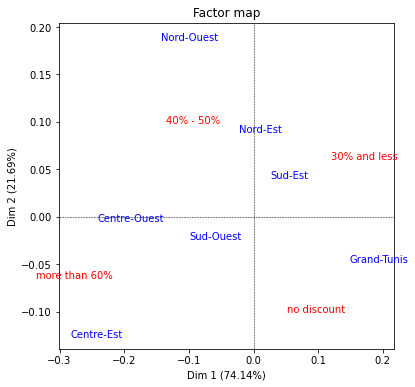

In [933]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(6,6))

# Remise/Age

In [917]:
table=pd.crosstab(df['discount_segment'], df['age_segment'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 68.831525605203
p_valeur: 2.5794283906869835e-11
degré de liberté: 9


In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_order             2964 non-null   int64         
 1   date_add             2964 non-null   datetime64[ns]
 2   id_customer          2964 non-null   int64         
 3   firstname            2964 non-null   object        
 4   lastname             2964 non-null   object        
 5   birthday             2964 non-null   datetime64[ns]
 6   postcode             2964 non-null   object        
 7   product_id           2964 non-null   int32         
 8   product_name         2964 non-null   object        
 9   product_price        2964 non-null   float64       
 10  reduction_percent    2964 non-null   float64       
 11  product_quantity     2964 non-null   float64       
 12  unit_price_tax_incl  2964 non-null   float64       
 13  total panier         2964 non-nul

In [919]:
X = "discount_segment"
Y = "age_segment"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [920]:
cont

age_segment,-30 ans,30-35ans,35-40ans,+40ans
discount_segment,,,,
no discount,209,274,319,158
30% and less,83,228,247,150
40% - 50%,138,183,308,153
more than 60%,75,97,215,119


In [921]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['-30 ans', '30-35ans', '35-40ans', '+40ans'], categories=['-30 ans', '30-35ans', '35-40ans', '+40ans'], ordered=True, name='age_segment', dtype='category'),
   row_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'))

In [922]:
#affichage des valeurs propres
print(afc.eig_)

[[1.32775487e-02 9.90228529e-03 1.05526451e-04]
 [5.70210144e+01 4.25257977e+01 4.53187963e-01]
 [5.70210144e+01 9.95468120e+01 1.00000000e+02]]


In [923]:
#informations sur les modalités lignes
print(afc.row_topandas())

                  row_coord_dim1  row_coord_dim2  row_coord_dim3  \
discount_segment                                                   
no discount            -0.146529        0.040508        0.005593   
30% and less            0.024913       -0.176004       -0.000096   
40% - 50%               0.038616        0.061133       -0.015546   
more than 60%           0.183462        0.074936        0.013550   

                  row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
discount_segment                                                         
no discount              52.516408          5.381495          9.625778   
30% and less              1.119569         74.927057          0.002089   
40% - 50%                 2.971162          9.984404         60.589765   
more than 60%            43.392861          9.707044         29.782369   

                  row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  
discount_segment                                               
no discount       

In [924]:
#statistiques pour les points colonnes
print(afc.col_topandas())

             col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
age_segment                                                                     
-30 ans           -0.162709        0.157490        0.006119         34.063907   
30-35ans          -0.106608       -0.135879       -0.002507         22.644418   
35-40ans           0.085659        0.040502       -0.010253         20.358756   
+40ans             0.124574       -0.029969        0.017303         22.932919   

             col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
age_segment                                                                     
-30 ans             42.791582          6.060613       0.515919       0.483351   
30-35ans            49.325697          1.575217       0.380939       0.618850   
35-40ans             6.103077         36.697842       0.807822       0.180605   
+40ans               1.779644         55.666328       0.928361       0.053729   

             col_cos2_dim3

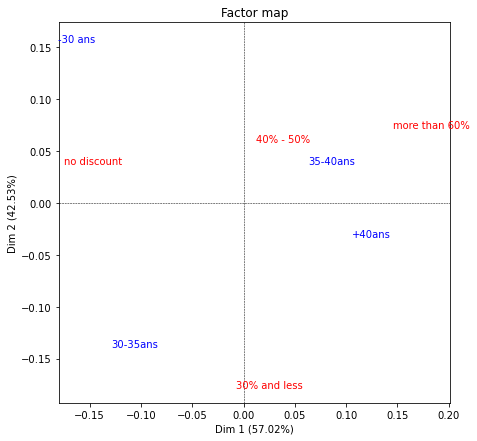

In [925]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# Remise/Gender

In [939]:
table=pd.crosstab(df['discount_segment'], df['gender'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 112.88100304978897
p_valeur: 2.6317802422770274e-24
degré de liberté: 3


In [940]:
X = "discount_segment"
Y = "gender"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [941]:
cont

gender,Femme,Homme
discount_segment,,
no discount,249,711
30% and less,284,425
40% - 50%,147,642
more than 60%,90,416


In [942]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=Index(['Femme', 'Homme'], dtype='object', name='gender'),
   row_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'))

In [943]:
#affichage des valeurs propres
print(afc.eig_)

[[3.80840091e-02]
 [1.00000000e+02]
 [1.00000000e+02]]


In [944]:
#informations sur les modalités lignes
print(afc.row_topandas())

                  row_coord_dim1  row_contrib_dim1  row_cos2_dim1
discount_segment                                                 
no discount            -0.000933          0.000740            1.0
30% and less            0.321038         64.734673            1.0
40% - 50%              -0.167548         19.621506            1.0
more than 60%          -0.186808         15.643081            1.0


In [945]:
#statistiques pour les points colonnes
print(afc.col_topandas())

        col_coord_dim1  col_contrib_dim1  col_cos2_dim1
gender                                                 
Femme         0.329416         74.021592            1.0
Homme        -0.115611         25.978408            1.0


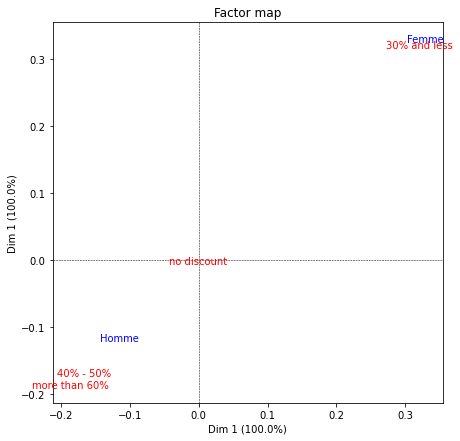

In [946]:
afc.mapping(num_x_axis=1,num_y_axis=1,figsize=(7,7))

# Remise/Class

In [947]:
table=pd.crosstab(df['discount_segment'], df['class'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 65.10339985184694
p_valeur: 2.6088689019563628e-09
degré de liberté: 12


In [948]:
X = "discount_segment"
Y = "class"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [949]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=Index(['A', 'B', 'C+', 'C-', 'D'], dtype='object', name='class'),
   row_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'))

In [950]:
#affichage des valeurs propres
print(afc.eig_)

[[1.22034440e-02 6.90150239e-03 2.85976344e-03]
 [5.55593226e+01 3.14208676e+01 1.30198098e+01]
 [5.55593226e+01 8.69801902e+01 1.00000000e+02]]


In [951]:
#informations sur les modalités lignes
print(afc.row_topandas())

                  row_coord_dim1  row_coord_dim2  row_coord_dim3  \
discount_segment                                                   
no discount             0.047192       -0.103535       -0.031718   
30% and less           -0.184241        0.036914       -0.024007   
40% - 50%               0.019500        0.006488        0.088186   
more than 60%           0.138214        0.134590       -0.043694   

                  row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
discount_segment                                                         
no discount               5.910827         50.306703         11.393806   
30% and less             66.536037          4.722936          4.820649   
40% - 50%                 0.829482          0.162357         72.388727   
more than 60%            26.723653         44.808004         11.396818   

                  row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  
discount_segment                                               
no discount       

In [952]:
#statistiques pour les points colonnes
print(afc.col_topandas())

       col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
class                                                                     
A           -0.168910        0.030609       -0.079762         15.854245   
B           -0.001161       -0.114598        0.004079          0.003774   
C+          -0.028932        0.064327       -0.037996          2.281717   
C-           0.168908        0.056877        0.036794         48.981687   
D           -0.288382        0.078241        0.185421         32.878578   

       col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
class                                                                     
A              0.920612         15.086123       0.796288       0.026149   
B             65.034099          0.198825       0.000102       0.998632   
C+            19.945067         16.793878       0.130407       0.644668   
C-             9.820865          9.918534       0.861443       0.097680   
D              4.279358 

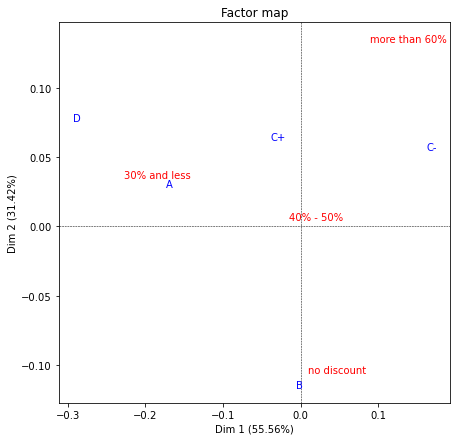

In [953]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# Total Achat/ Region

In [954]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['region'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 45.37822170565366
p_valeur: 8.875292233327024e-06
degré de liberté: 12


In [955]:
X = "Basket_value"
Y = "region"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [956]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=Index(['Centre-Est', 'Centre-Ouest', 'Grand-Tunis', 'Nord-Est', 'Nord-Ouest',
       'Sud-Est', 'Sud-Ouest'],
      dtype='object', name='region'),
   row_labels=CategoricalIndex(['less than 100DT', '100DT - 200DT', 'more than 200DT'], categories=['less than 100DT', '100DT - 200DT', 'more than 200DT'], ordered=True, name='Basket_value', dtype='category'))

In [957]:
#affichage des valeurs propres
print(afc.eig_)

[[1.77393298e-02 3.42588551e-03]
 [8.38136043e+01 1.61863957e+01]
 [8.38136043e+01 1.00000000e+02]]


In [958]:
#informations sur les modalités lignes
print(afc.row_topandas())

                 row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Basket_value                                                        
less than 100DT        0.030272       -0.084102          1.657690   
100DT - 200DT          0.112266        0.048539         29.626196   
more than 200DT       -0.215646        0.025745         68.716115   

                 row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Basket_value                                                     
less than 100DT         66.252758       0.114698       0.885302  
100DT - 200DT           28.676043       0.842510       0.157490  
more than 200DT          5.071199       0.985948       0.014052  


In [959]:
#statistiques pour les points colonnes
print(afc.col_topandas())

              col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
region                                                           
Centre-Est          0.117612        0.039656         10.401813   
Centre-Ouest       -0.238269        0.017058         34.332276   
Grand-Tunis        -0.030607       -0.031816          1.751300   
Nord-Est            0.182109       -0.008800         23.717491   
Nord-Ouest          0.080112       -0.111154          3.526789   
Sud-Est             0.102400        0.128671          5.431279   
Sud-Ouest          -0.182105        0.031939         20.839052   

              col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
region                                                        
Centre-Est            6.123178       0.897920       0.102080  
Centre-Ouest          0.911149       0.994901       0.005099  
Grand-Tunis           9.798811       0.480640       0.519360  
Nord-Est              0.286796       0.997670       0.002330  
Nord-Ouest           35.156

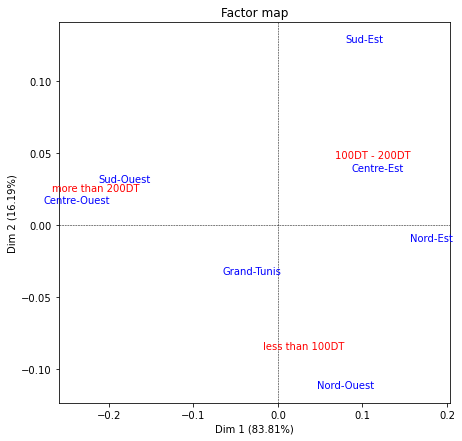

In [960]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# Total achat/Gender

In [961]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['gender'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 7.619530676421657
p_valeur: 0.022153376898193508
degré de liberté: 2


In [962]:
#variables indépendantes

# Total achat/Age

In [963]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['age_segment'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 39.67932097139561
p_valeur: 5.266172350751996e-07
degré de liberté: 6


In [1031]:
X = "Basket_value"
Y = "age_segment"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [1032]:
cont

age_segment,-30 ans,30-35ans,35-40ans,+40ans
Basket_value,,,,
less than 100DT,168,193,224,102
100DT - 200DT,125,246,341,182
more than 200DT,96,129,217,116


In [1033]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['-30 ans', '30-35ans', '35-40ans', '+40ans'], categories=['-30 ans', '30-35ans', '35-40ans', '+40ans'], ordered=True, name='age_segment', dtype='category'),
   row_labels=CategoricalIndex(['less than 100DT', '100DT - 200DT', 'more than 200DT'], categories=['less than 100DT', '100DT - 200DT', 'more than 200DT'], ordered=True, name='Basket_value', dtype='category'))

In [1034]:
#affichage des valeurs propres
print(afc.eig_)

[[1.66690366e-02 1.88137060e-03]
 [8.98580631e+01 1.01419369e+01]
 [8.98580631e+01 1.00000000e+02]]


In [1035]:
#informations sur les modalités lignes
print(afc.row_topandas())

                 row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Basket_value                                                        
less than 100DT        0.186129       -0.008136         66.752106   
100DT - 200DT         -0.104039       -0.037395         27.139874   
more than 200DT       -0.062473        0.069929          6.108021   

                 row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Basket_value                                                     
less than 100DT          1.130082       0.998093       0.001907  
100DT - 200DT           31.064895       0.885591       0.114409  
more than 200DT         67.805023       0.443867       0.556133  


In [1036]:
#statistiques pour les points colonnes
print(afc.col_topandas())

             col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
age_segment                                                     
-30 ans            0.244258        0.039826         65.091749   
30-35ans           0.030959       -0.070972          1.526870   
35-40ans          -0.072710        0.017704         11.594996   
+40ans            -0.139355        0.027438         21.786385   

             col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
age_segment                                                  
-30 ans             15.331823       0.974104       0.025896  
30-35ans            71.094434       0.159864       0.840136  
35-40ans             6.090756       0.944031       0.055969  
+40ans               7.482986       0.962681       0.037319  


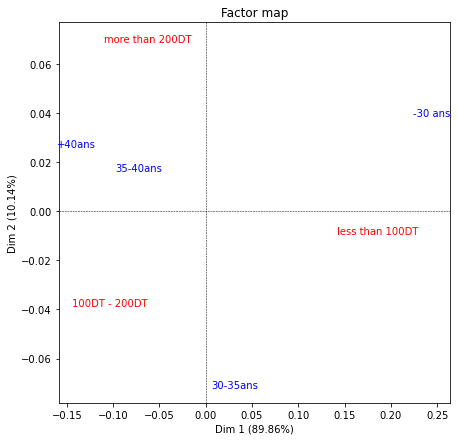

In [1038]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# Total achat/Class

In [1039]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['class'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 27.124050601437727
p_valeur: 0.000672945219519261
degré de liberté: 8


# Region/nb piece

In [1041]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['region'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 75.78213670326602
p_valeur: 2.8172168663456674e-07
degré de liberté: 24


In [1042]:
#indépendantes

# Age/nb piece

In [1043]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['age_segment'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 142.84614455124574
p_valeur: 1.5937054467283952e-24
degré de liberté: 12


In [1044]:
X = "piece_segment"
Y = "age_segment"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [1045]:
cont

age_segment,-30 ans,30-35ans,35-40ans,+40ans
piece_segment,,,,
1 piece,160,193,177,70
2 pieces,167,224,349,174
3-5 pieces,55,134,199,133
6-10 pieces,7,16,53,10
more than 10 pieces,0,2,4,13


In [1046]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['-30 ans', '30-35ans', '35-40ans', '+40ans'], categories=['-30 ans', '30-35ans', '35-40ans', '+40ans'], ordered=True, name='age_segment', dtype='category'),
   row_labels=CategoricalIndex(['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces',
                  'more than 10 pieces'],
                 categories=['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces', 'more than 10 pieces'], ordered=True, name='piece_segment', dtype='category'))

In [1047]:
#affichage des valeurs propres
print(afc.eig_)

[[4.94179123e-02 1.55746245e-02 1.75799806e-03]
 [7.40337324e+01 2.33325838e+01 2.63368385e+00]
 [7.40337324e+01 9.73663162e+01 1.00000000e+02]]


In [1048]:
#informations sur les modalités lignes
print(afc.row_topandas())

                     row_coord_dim1  row_coord_dim2  row_coord_dim3  \
piece_segment                                                         
1 piece                   -0.297056       -0.053648       -0.014106   
2 pieces                   0.022390        0.022490        0.037791   
3-5 pieces                 0.231637       -0.031735       -0.057648   
6-10 pieces                0.199023        0.488527        0.006688   
more than 10 pieces        1.051060       -0.728776        0.178020   

                     row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
piece_segment                                                               
1 piece                     50.064399          5.181067          3.173485   
2 pieces                     0.433271          1.387063         34.696398   
3-5 pieces                  26.433526          1.574298         46.022724   
6-10 pieces                  3.221111         61.580722          0.102239   
more than 10 pieces         19.847694   

In [1049]:
#statistiques pour les points colonnes
print(afc.col_topandas())

             col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
age_segment                                                                     
-30 ans           -0.342949       -0.064958        0.057035         43.262358   
30-35ans          -0.126418       -0.045202       -0.063676          8.598687   
35-40ans           0.092519        0.153854        0.008746          6.329503   
+40ans             0.332473       -0.173313        0.018014         41.809452   

             col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
age_segment                                                                     
-30 ans              4.924795         33.635276       0.940261       0.033733   
30-35ans             3.488192         61.324336       0.723820       0.092541   
35-40ans            55.538395          1.590047       0.264948       0.732685   
+40ans              36.048618          3.450341       0.784516       0.213181   

             col_cos2_dim3

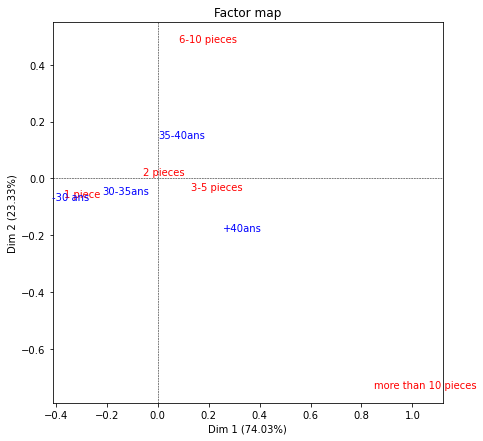

In [1050]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# Gender/nb piece

In [973]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['gender'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 31.697543549599814
p_valeur: 2.205637418046333e-06
degré de liberté: 4


In [974]:
#indépendantes

# Class/nb piece

In [975]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['class'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 107.51155164428965
p_valeur: 1.3303726159696517e-15
degré de liberté: 16


In [976]:
#indépendantes

# Timing/V.panier

# shopping_time/Age

In [977]:
table=pd.crosstab(df['purchase time'], df['discount_segment'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 122.3767411711135
p_valeur: 6.535977370812175e-19
degré de liberté: 15


In [978]:
X = "purchase time"
Y = "discount_segment"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [979]:
cont

discount_segment,no discount,30% and less,40% - 50%,more than 60%
purchase time,,,,
Early_morning,102,79,90,20
Late_morning,134,106,147,127
Early_afternoon,139,120,133,93
Late_afternoon,160,156,142,129
Evening,151,65,130,69
Night,258,138,132,66


In [980]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'),
   row_labels=CategoricalIndex(['Early_morning', 'Late_morning', 'Early_afternoon',
                  'Late_afternoon', 'Evening', 'Night'],
                 categories=['Early_morning', 'Late_morning', 'Early_afternoon', 'Late_afternoon', 'Evening', 'Night'], ordered=True, name='purchase time', dtype='category'))

In [981]:
#affichage des valeurs propres
print(afc.eig_)

[[2.99393697e-02 7.77567370e-03 4.68853982e-03]
 [7.06057541e+01 1.83373034e+01 1.10569425e+01]
 [7.06057541e+01 8.89430575e+01 1.00000000e+02]]


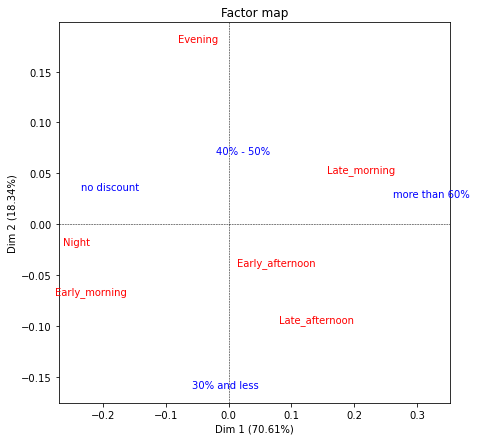

In [982]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# period_of_month/Age

In [983]:
table=pd.crosstab(df['age_segment'], df['period of month'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 19.928901337229142
p_valeur: 0.002851250668515083
degré de liberté: 6


In [984]:
#indép

In [985]:
X = "age_segment"
Y = "period of month"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [986]:
cont

period of month,Start of month,Middle of month,End of month
age_segment,,,
-30 ans,180,157,163
30-35ans,334,226,214
35-40ans,389,296,386
+40ans,203,173,199


# period of month/remise

In [987]:
table=pd.crosstab(df['discount_segment'], df['period of month'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 174.6025700106031
p_valeur: 4.747810828935521e-35
degré de liberté: 6


In [988]:
X = "discount_segment"
Y = "period of month"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [989]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['Start of month', 'Middle of month', 'End of month'], categories=['Start of month', 'Middle of month', 'End of month'], ordered=True, name='period of month', dtype='category'),
   row_labels=CategoricalIndex(['no discount', '30% and less', '40% - 50%', 'more than 60%'], categories=['no discount', '30% and less', '40% - 50%', 'more than 60%'], ordered=False, name='discount_segment', dtype='category'))

In [990]:
#affichage des valeurs propres
print(afc.eig_)

[[4.50929607e-02 1.45390645e-02]
 [7.56186974e+01 2.43813026e+01]
 [7.56186974e+01 1.00000000e+02]]


In [991]:
#informations sur les modalités lignes
print(afc.row_topandas())

                  row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
discount_segment                                                     
no discount            -0.000057        0.076349          0.000002   
30% and less           -0.269426        0.073896         38.980225   
40% - 50%               0.312688        0.004712         57.168994   
more than 60%          -0.101041       -0.258003          3.850779   

                  row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
discount_segment                                                  
no discount              12.994771   5.530546e-07       0.999999  
30% and less              9.094528   9.300377e-01       0.069962  
40% - 50%                 0.040271   9.997729e-01       0.000227  
more than 60%            77.870430   1.329776e-01       0.867022  


In [992]:
#statistiques pour les points colonnes
print(afc.col_topandas())

                 col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
period of month                                                     
Start of month        -0.271859        0.011041         61.910073   
Middle of month        0.185336        0.154552         22.373835   
End of month           0.146867       -0.150858         15.716092   

                 col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
period of month                                                  
Start of month           0.316703       0.998353       0.001647  
Middle of month         48.254580       0.589836       0.410164  
End of month            51.428717       0.486597       0.513403  


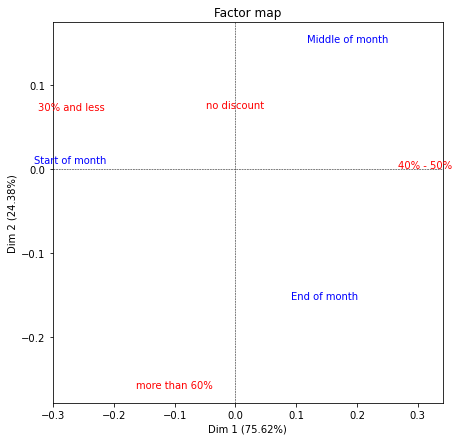

In [993]:
# représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# total panier/shopping_time

In [994]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['purchase time'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 21.614309674884595
p_valeur: 0.017194652841374936
degré de liberté: 10


In [995]:
X = "Basket_value"
Y = "purchase time"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [996]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['Early_morning', 'Late_morning', 'Early_afternoon',
                  'Late_afternoon', 'Evening', 'Night'],
                 categories=['Early_morning', 'Late_morning', 'Early_afternoon', 'Late_afternoon', 'Evening', 'Night'], ordered=True, name='purchase time', dtype='category'),
   row_labels=CategoricalIndex(['less than 100DT', '100DT - 200DT', 'more than 200DT'], categories=['less than 100DT', '100DT - 200DT', 'more than 200DT'], ordered=True, name='Basket_value', dtype='category'))

In [997]:
#affichage des valeurs propres
print(afc.eig_)

[[6.40843905e-03 3.95813634e-03]
 [6.18182843e+01 3.81817157e+01]
 [6.18182843e+01 1.00000000e+02]]


In [998]:
#informations sur les modalités lignes
print(afc.row_topandas())

                 row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Basket_value                                                        
less than 100DT        0.095534        0.053583         45.218140   
100DT - 200DT          0.000302       -0.074202          0.000596   
more than 200DT       -0.115258        0.053053         54.781264   

                 row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Basket_value                                                     
less than 100DT         23.031261       0.760694       0.239306  
100DT - 200DT           58.176862       0.000017       0.999983  
more than 200DT         18.791878       0.825169       0.174831  


In [999]:
#statistiques pour les points colonnes
print(afc.col_topandas())

                 col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
purchase time                                                       
Early_morning         -0.124625       -0.048086         23.945226   
Late_morning           0.097132        0.021041         26.478990   
Early_afternoon        0.101629       -0.070252         27.982406   
Late_afternoon        -0.029380       -0.002539          2.726199   
Evening               -0.010232        0.132704          0.242122   
Night                 -0.077814       -0.030384         18.625058   

                 col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
purchase time                                                    
Early_morning            5.771674       0.870417       0.129583  
Late_morning             2.011733       0.955178       0.044822  
Early_afternoon         21.648425       0.676665       0.323335  
Late_afternoon           0.032957       0.992589       0.007411  
Evening                 65.937487       0.005910   

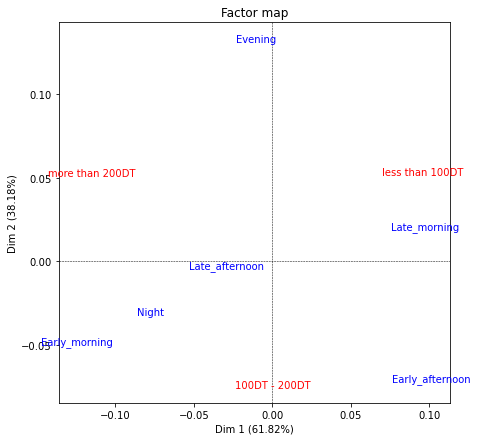

In [1000]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# total panier/season

In [1001]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['season'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 50.01708826546096
p_valeur: 4.6641329734477e-09
degré de liberté: 6


In [1002]:
X = "Basket_value"
Y = "season"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [1003]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['autumn', 'spring', 'summer', 'winter'], categories=['autumn', 'spring', 'summer', 'winter'], ordered=False, name='season', dtype='category'),
   row_labels=CategoricalIndex(['less than 100DT', '100DT - 200DT', 'more than 200DT'], categories=['less than 100DT', '100DT - 200DT', 'more than 200DT'], ordered=True, name='Basket_value', dtype='category'))

In [1004]:
#affichage des valeurs propres
print(afc.eig_)

[[1.91561416e-02 4.17272418e-03]
 [8.21134717e+01 1.78865283e+01]
 [8.21134717e+01 1.00000000e+02]]


In [1005]:
#informations sur les modalités lignes
print(afc.row_topandas())

                 row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Basket_value                                                        
less than 100DT        0.170579        0.049925         48.742527   
100DT - 200DT         -0.009857       -0.076244          0.211492   
more than 200DT       -0.193143        0.060168         51.045982   

                 row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Basket_value                                                     
less than 100DT         19.167921       0.921099       0.078901  
100DT - 200DT           58.090747       0.016439       0.983561  
more than 200DT         22.741332       0.911541       0.088459  


In [1006]:
#statistiques pour les points colonnes
print(afc.col_topandas())

        col_coord_dim1  col_coord_dim2  col_contrib_dim1  col_contrib_dim2  \
season                                                                       
autumn        0.063027        0.065049          7.321884         35.804095   
spring        0.026768       -0.109781          0.819970         63.314721   
summer        0.191992       -0.009399         29.348207          0.322919   
winter       -0.208600        0.009201         62.509939          0.558265   

        col_cos2_dim1  col_cos2_dim2  
season                                
autumn       0.484220       0.515780  
spring       0.056118       0.943882  
summer       0.997609       0.002391  
winter       0.998058       0.001942  


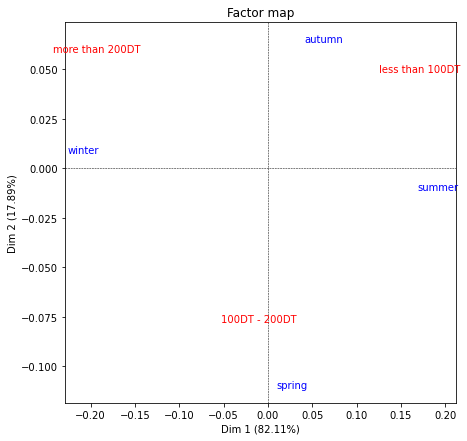

In [1007]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# total panier/ period of month

In [1008]:
table=pd.crosstab(df_ticket['Basket_value'], df_ticket['period of month'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 2.857371963027088
p_valeur: 0.5819704424163661
degré de liberté: 4


In [1009]:
#indépendantes

# nb piece / shopping time

In [1010]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['purchase time'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

KeyError: 'Grouping_pieces'

In [1051]:
X = "piece_segment"
Y = "purchase time"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [1052]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['Early_morning', 'Late_morning', 'Early_afternoon',
                  'Late_afternoon', 'Evening', 'Night'],
                 categories=['Early_morning', 'Late_morning', 'Early_afternoon', 'Late_afternoon', 'Evening', 'Night'], ordered=True, name='purchase time', dtype='category'),
   row_labels=CategoricalIndex(['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces',
                  'more than 10 pieces'],
                 categories=['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces', 'more than 10 pieces'], ordered=True, name='piece_segment', dtype='category'))

In [1053]:
#affichage des valeurs propres
print(afc.eig_)

[[2.25871371e-02 9.60688068e-03 4.92734399e-03 2.57904473e-03]
 [5.68939694e+01 2.41984441e+01 1.24113187e+01 6.49626781e+00]
 [5.68939694e+01 8.10924135e+01 9.35037322e+01 1.00000000e+02]]


In [1054]:
#informations sur les modalités lignes
print(afc.row_topandas())

                     row_coord_dim1  row_coord_dim2  row_coord_dim3  \
piece_segment                                                         
1 piece                    0.075754       -0.091787       -0.066436   
2 pieces                  -0.148383       -0.012752        0.042274   
3-5 pieces                 0.075990        0.139948       -0.042313   
6-10 pieces                0.440081        0.033918        0.237734   
more than 10 pieces        0.454924       -0.507437        0.081344   

                     row_coord_dim4  row_contrib_dim1  row_contrib_dim2  \
piece_segment                                                             
1 piece                    0.037705          7.100827         24.509591   
2 pieces                  -0.003707         41.309131          0.717340   
3-5 pieces                -0.033398          6.250457         49.843373   
6-10 pieces                0.072060         36.994021          0.516673   
more than 10 pieces       -0.429363          8.34556

In [1055]:
#statistiques pour les points colonnes
print(afc.col_topandas())

                 col_coord_dim1  col_coord_dim2  col_coord_dim3  \
purchase time                                                     
Early_morning          0.206878        0.091007        0.166990   
Late_morning          -0.026423        0.076659       -0.082448   
Early_afternoon        0.190944       -0.108432       -0.046534   
Late_afternoon         0.064138        0.029510       -0.022780   
Evening               -0.177336       -0.170745        0.053295   
Night                 -0.180446        0.077945        0.015892   

                 col_coord_dim4  col_contrib_dim1  col_contrib_dim2  \
purchase time                                                         
Early_morning          0.033432         18.711980          8.513691   
Late_morning           0.050576          0.555670         10.996526   
Early_afternoon        0.031428         28.012118         21.238620   
Late_afternoon        -0.094845          3.693115          1.838109   
Evening               -0.001453      

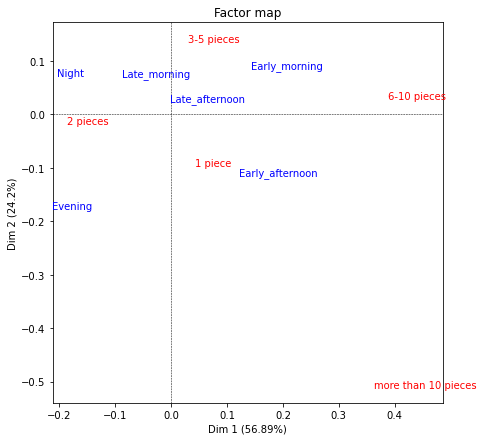

In [1056]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# nb piece/season

In [1016]:
table=pd.crosstab(df_ticket['piece_segment'], df_ticket['season'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

statistique de test: 179.98004242224462
p_valeur: 4.306792977347871e-32
degré de liberté: 12


In [1017]:
X = "piece_segment"
Y = "season"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

In [1018]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['autumn', 'spring', 'summer', 'winter'], categories=['autumn', 'spring', 'summer', 'winter'], ordered=False, name='season', dtype='category'),
   row_labels=CategoricalIndex(['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces',
                  'more than 10 pieces'],
                 categories=['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces', 'more than 10 pieces'], ordered=True, name='piece_segment', dtype='category'))

In [1019]:
#affichage des valeurs propres
print(afc.eig_)

[[7.92545022e-02 3.19826171e-03 1.45401577e-03]
 [9.44554212e+01 3.81168449e+00 1.73289426e+00]
 [9.44554212e+01 9.82671057e+01 1.00000000e+02]]


In [1020]:
#informations sur les modalités lignes
print(afc.row_topandas())

                     row_coord_dim1  row_coord_dim2  row_coord_dim3  \
piece_segment                                                         
1 piece                    0.144824       -0.028183       -0.053886   
2 pieces                   0.170805        0.018010        0.033330   
3-5 pieces                -0.334917        0.040402       -0.006214   
6-10 pieces               -0.867085       -0.137543        0.033835   
more than 10 pieces        0.493366       -0.431240        0.111276   

                     row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
piece_segment                                                               
1 piece                      7.414881          6.958467         55.953716   
2 pieces                    15.685457          4.321573         32.554523   
3-5 pieces                  34.376340         12.396286          0.644940   
6-10 pieces                 39.802867         24.818566          3.303543   
more than 10 pieces          2.720455   

In [1021]:
#statistiques pour les points colonnes
print(afc.col_topandas())

        col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
season                                                                     
autumn        0.070603        0.028585        0.046879          2.222642   
spring       -0.481365       -0.044543       -0.005368         64.061261   
summer       -0.032469        0.101395       -0.058227          0.202778   
winter        0.310748       -0.057438       -0.023680         33.513319   

        col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
season                                                                     
autumn          9.028289         53.411074       0.623137       0.102143   
spring         13.593101          0.434216       0.991388       0.008489   
summer         49.005270         35.547196       0.071590       0.698171   
winter         28.373340         10.607514       0.961564       0.032852   

        col_cos2_dim3  
season                 
autumn       0.274720  
spring       0

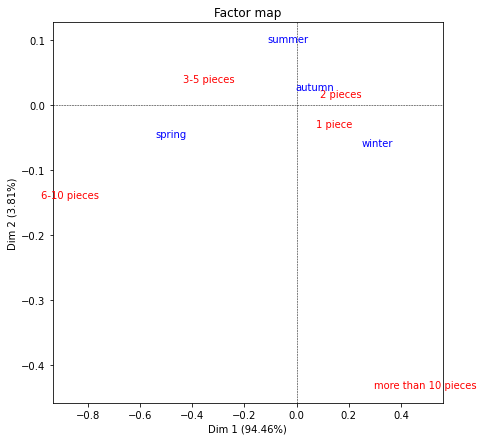

In [1022]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# nb piece/period of month

In [1023]:
table=pd.crosstab(df_ticket['Grouping_pieces'], df_ticket['period_of_month'])
resultats_test=chi2_contingency(table)
print('statistique de test:', resultats_test[0])
print('p_valeur:',resultats_test[1])
print('degré de liberté:', resultats_test[2])

KeyError: 'Grouping_pieces'

In [1024]:
X = "Grouping_pieces"
Y = "period_of_month"

cont = df_ticket[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df_ticket[X].value_counts()
ty = df_ticket[Y].value_counts()

cont = cont.astype(int)

KeyError: "None of [Index(['Grouping_pieces', 'period_of_month'], dtype='object')] are in the [columns]"

In [1025]:
afc = CA(row_labels=cont.index,col_labels=cont.columns)
afc.fit(cont.values)

CA(col_labels=CategoricalIndex(['autumn', 'spring', 'summer', 'winter'], categories=['autumn', 'spring', 'summer', 'winter'], ordered=False, name='season', dtype='category'),
   row_labels=CategoricalIndex(['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces',
                  'more than 10 pieces'],
                 categories=['1 piece', '2 pieces', '3-5 pieces', '6-10 pieces', 'more than 10 pieces'], ordered=True, name='piece_segment', dtype='category'))

In [1026]:
#affichage des valeurs propres
print(afc.eig_)

[[7.92545022e-02 3.19826171e-03 1.45401577e-03]
 [9.44554212e+01 3.81168449e+00 1.73289426e+00]
 [9.44554212e+01 9.82671057e+01 1.00000000e+02]]


In [1027]:
#informations sur les modalités lignes
print(afc.row_topandas())

                     row_coord_dim1  row_coord_dim2  row_coord_dim3  \
piece_segment                                                         
1 piece                    0.144824       -0.028183       -0.053886   
2 pieces                   0.170805        0.018010        0.033330   
3-5 pieces                -0.334917        0.040402       -0.006214   
6-10 pieces               -0.867085       -0.137543        0.033835   
more than 10 pieces        0.493366       -0.431240        0.111276   

                     row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  \
piece_segment                                                               
1 piece                      7.414881          6.958467         55.953716   
2 pieces                    15.685457          4.321573         32.554523   
3-5 pieces                  34.376340         12.396286          0.644940   
6-10 pieces                 39.802867         24.818566          3.303543   
more than 10 pieces          2.720455   

In [1028]:
#statistiques pour les points colonnes
print(afc.col_topandas())

        col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
season                                                                     
autumn        0.070603        0.028585        0.046879          2.222642   
spring       -0.481365       -0.044543       -0.005368         64.061261   
summer       -0.032469        0.101395       -0.058227          0.202778   
winter        0.310748       -0.057438       -0.023680         33.513319   

        col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
season                                                                     
autumn          9.028289         53.411074       0.623137       0.102143   
spring         13.593101          0.434216       0.991388       0.008489   
summer         49.005270         35.547196       0.071590       0.698171   
winter         28.373340         10.607514       0.961564       0.032852   

        col_cos2_dim3  
season                 
autumn       0.274720  
spring       0

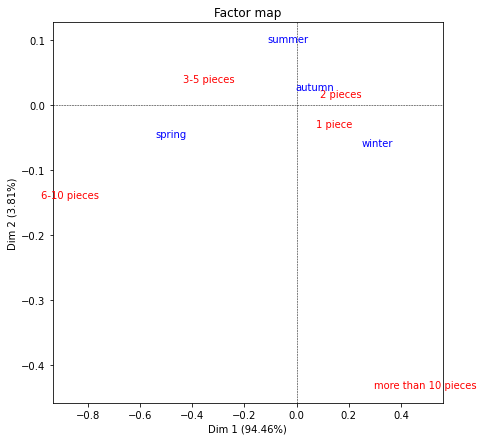

In [1029]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

# ACM

In [1030]:
pip install mca

In [1057]:
from fanalysis.mca import MCA

In [1058]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_order             2964 non-null   int64         
 1   date_add             2964 non-null   datetime64[ns]
 2   id_customer          2964 non-null   int64         
 3   firstname            2964 non-null   object        
 4   lastname             2964 non-null   object        
 5   birthday             2964 non-null   datetime64[ns]
 6   postcode             2964 non-null   object        
 7   product_id           2964 non-null   int32         
 8   product_name         2964 non-null   object        
 9   product_price        2964 non-null   float64       
 10  reduction_percent    2964 non-null   float64       
 11  product_quantity     2964 non-null   float64       
 12  unit_price_tax_incl  2964 non-null   float64       
 13  total panier         2964 non-nul

In [1088]:
df_acm=pd.DataFrame(columns = ['griffe','class','age_segment','discount_segment','piece_segment','Basket_value'])

In [1089]:
df_acm['griffe']=df['griffe']
df_acm['class']=df['class']
df_acm['age_segment']=df['age_segment']
df_acm['discount_segment']=df['discount_segment']
df_acm['piece_segment']=df['piece_segment']
df_acm['Basket_value']=df['Basket_value']

In [1090]:
dc=pd.DataFrame(pd.get_dummies(df_acm))
dc.head()

,griffe_BLUE ISLAND,griffe_BLUE&SON,griffe_ISLAND CLUB,griffe_ISLD,class_A,class_B,class_C+,class_C-,class_D,age_segment_-30 ans,...,discount_segment_40% - 50%,discount_segment_more than 60%,piece_segment_1 piece,piece_segment_2 pieces,piece_segment_3-5 pieces,piece_segment_6-10 pieces,piece_segment_more than 10 pieces,Basket_value_less than 100DT,Basket_value_100DT - 200DT,Basket_value_more than 200DT
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [1091]:
X = df_acm.iloc[:, 1:6].to_numpy()
X = X.astype(str)

In [1092]:
my_mca = MCA(row_labels=df_acm.index.values, var_labels=df_acm.columns.values)

In [1093]:
my_mca.fit(X)

MCA(row_labels=array([   0,    1,    2, ..., 2961, 2962, 2963], dtype=int64),
    var_labels=array(['griffe', 'class', 'age_segment', 'discount_segment',
       'piece_segment', 'Basket_value'], dtype=object))

In [1094]:
print(my_mca.eig_)

[[3.58492657e-01 2.98883197e-01 2.74499086e-01 2.49847107e-01
  2.34969457e-01 2.12557942e-01 2.11222246e-01 2.04163622e-01
  1.95592168e-01 1.92864761e-01 1.86412153e-01 1.75158096e-01
  1.71415746e-01 1.66342143e-01 1.53123483e-01 1.38930263e-01
  1.15410267e-01 6.01156057e-02]
 [9.95812936e+00 8.30231103e+00 7.62497460e+00 6.94019741e+00
  6.52692937e+00 5.90438728e+00 5.86728460e+00 5.67121173e+00
  5.43311578e+00 5.35735448e+00 5.17811537e+00 4.86550266e+00
  4.76154851e+00 4.62061509e+00 4.25343008e+00 3.85917398e+00
  3.20584074e+00 1.66987793e+00]
 [9.95812936e+00 1.82604404e+01 2.58854150e+01 3.28256124e+01
  3.93525418e+01 4.52569291e+01 5.11242137e+01 5.67954254e+01
  6.22285412e+01 6.75858956e+01 7.27640110e+01 7.76295137e+01
  8.23910622e+01 8.70116773e+01 9.12651073e+01 9.51242813e+01
  9.83301221e+01 1.00000000e+02]]


In [1095]:
df_cols = my_mca.col_topandas()
print(df_cols)

                          col_coord_dim1  col_coord_dim2  col_coord_dim3  \
col0_A                          0.109738       -0.050449        0.874431   
col0_B                         -0.173440       -0.537106       -0.086687   
col0_C+                         0.338280        0.566589       -0.239215   
col0_C-                        -0.256301       -0.113798        0.336320   
col0_D                         -0.145068        0.463220       -0.426121   
col1_+40ans                     0.285860        0.273098        0.477561   
col1_-30 ans                   -0.522635       -0.596811       -0.608645   
col1_30-35ans                  -0.112560       -0.227017        0.072639   
col1_35-40ans                   0.156278        0.256814        0.030975   
col1_nan                        1.995924        5.106264       -7.519391   
col2_30% and less               0.191827        0.672868        0.407356   
col2_40% - 50%                 -0.437932        0.189515       -0.198958   
col2_more th

In [1096]:
df_rows = my_mca.col_topandas()
print(df_rows)

                          col_coord_dim1  col_coord_dim2  col_coord_dim3  \
col0_A                          0.109738       -0.050449        0.874431   
col0_B                         -0.173440       -0.537106       -0.086687   
col0_C+                         0.338280        0.566589       -0.239215   
col0_C-                        -0.256301       -0.113798        0.336320   
col0_D                         -0.145068        0.463220       -0.426121   
col1_+40ans                     0.285860        0.273098        0.477561   
col1_-30 ans                   -0.522635       -0.596811       -0.608645   
col1_30-35ans                  -0.112560       -0.227017        0.072639   
col1_35-40ans                   0.156278        0.256814        0.030975   
col1_nan                        1.995924        5.106264       -7.519391   
col2_30% and less               0.191827        0.672868        0.407356   
col2_40% - 50%                 -0.437932        0.189515       -0.198958   
col2_more th

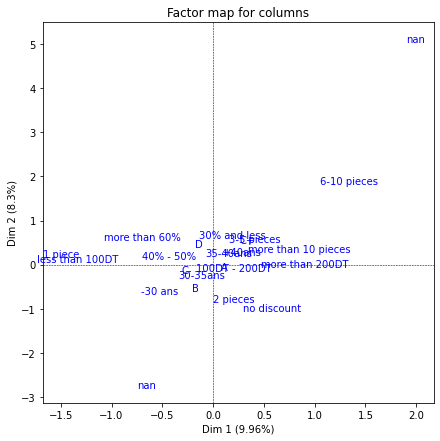

In [1097]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(7, 7))

# Algorithme K-Means

In [1098]:
df.columns

Index(['id_order', 'date_add', 'id_customer', 'firstname', 'lastname',
       'birthday', 'postcode', 'product_id', 'product_name', 'product_price',
       'reduction_percent', 'product_quantity', 'unit_price_tax_incl',
       'total panier', 'griffe', 'age', 'product', 'gender', 'region', 'area',
       'class', 'total_quantity', 'total_basket', 'age_segment',
       'discount_segment', 'piece_segment', 'Basket_value', 'period of month',
       'purchase time', 'season'],
      dtype='object')

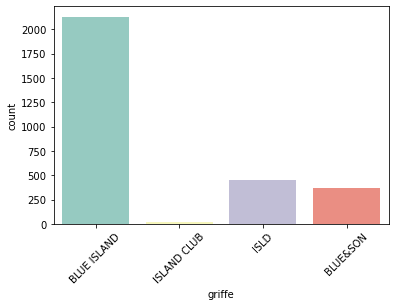

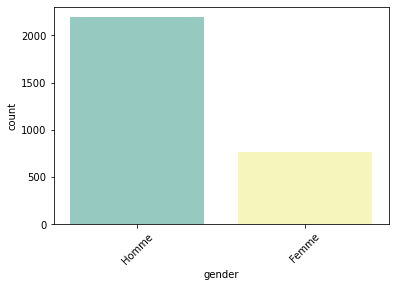

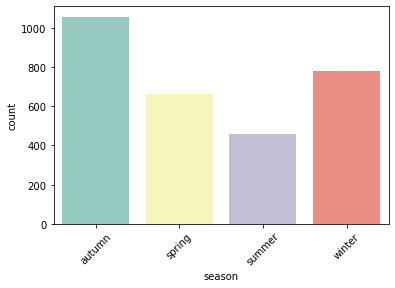

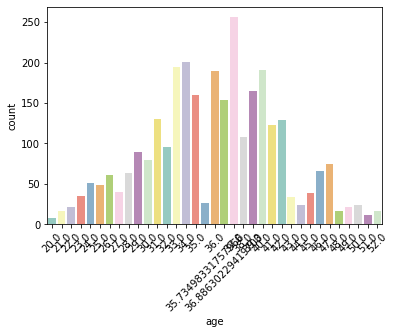

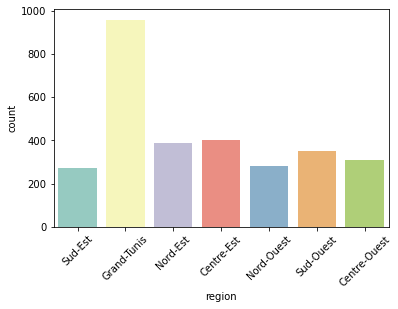

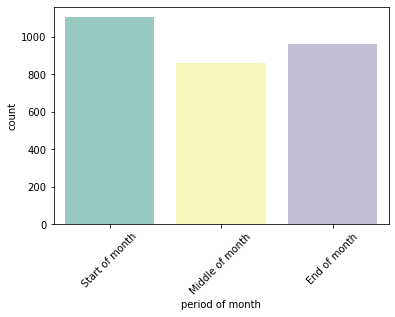

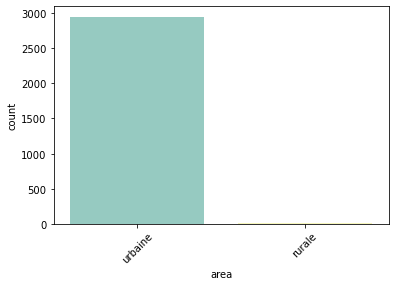

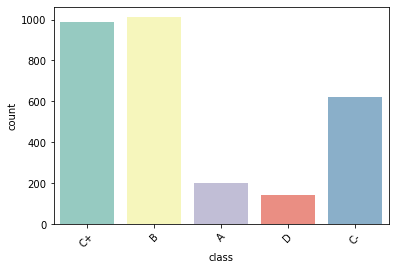

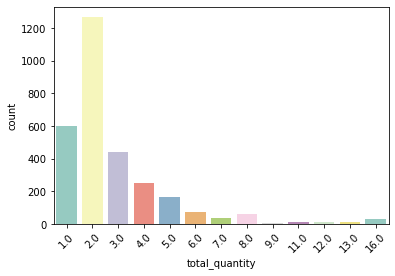

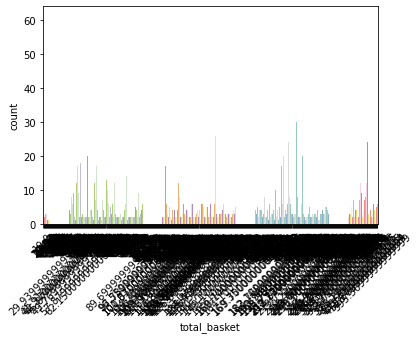

In [1100]:
features = ['griffe', 'gender',
       'season', 'age', 'region', 'period of month','area',
       'class','total_quantity', 'total_basket']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

In [1101]:
raw_data = df[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)
print(new_raw_data.shape)
new_raw_data.head()


(2964, 10)
(2964, 741)


,griffe_BLUE ISLAND,griffe_BLUE&SON,griffe_ISLAND CLUB,griffe_ISLD,gender_Femme,gender_Homme,season_autumn,season_spring,season_summer,season_winter,...,total_basket_639.0,total_basket_663.23,total_basket_765.5,total_basket_778.0,total_basket_808.0,total_basket_838.0,total_basket_848.0,total_basket_1145.9,total_basket_1336.4,total_basket_1594.0
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1102]:
raw_data.head()

,griffe,gender,season,age,region,period of month,area,class,total_quantity,total_basket
0,BLUE ISLAND,Homme,winter,35.0,Sud-Est,Start of month,urbaine,C+,2.0,169.8
1,BLUE ISLAND,Homme,winter,35.0,Sud-Est,Start of month,urbaine,C+,2.0,169.8
2,BLUE ISLAND,Homme,winter,34.0,Grand-Tunis,Start of month,urbaine,B,2.0,559.8
3,BLUE ISLAND,Homme,winter,34.0,Grand-Tunis,Start of month,urbaine,B,2.0,559.8
4,BLUE ISLAND,Femme,winter,24.0,Nord-Est,Start of month,urbaine,B,2.0,618.9


# K-means Clustering

In [1105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = new_raw_data.values


In [1106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [1118]:
X_pca = pca.fit_transform(X_train)

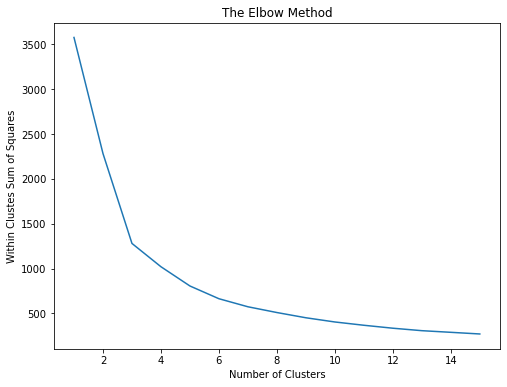

In [1119]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1,16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clustes Sum of Squares')
plt.show()

In [1138]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

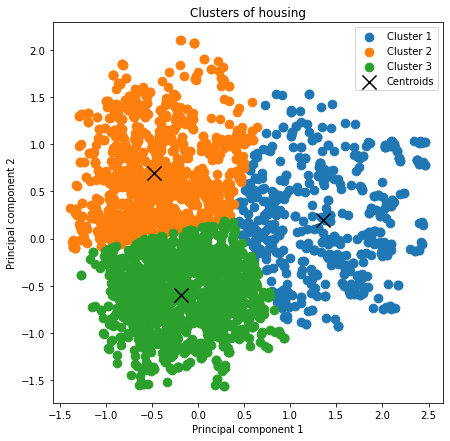

In [1139]:
plt.figure(figsize=(7,7))
for i in range(kmeans.n_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s = 75, label = 'Cluster ' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of housing')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.show()

In [1146]:
#Cluster K-means
model=KMeans(n_clusters=3)
#adapter le modèle de données
model.fit(X_pca)

KMeans(n_clusters=3)

In [1147]:
print(model.labels_)

[1 1 1 ... 1 1 1]


In [1149]:
df

,id_order,date_add,id_customer,firstname,lastname,birthday,postcode,product_id,product_name,product_price,...,class,total_quantity,total_basket,age_segment,discount_segment,piece_segment,Basket_value,period of month,purchase time,season
0,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1381,PULL HOMME,79.9,...,C+,2.0,169.8,30-35ans,no discount,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
1,179,2018-01-05 13:02:30,894,Wael,ben yahmed,1983-02-21 16:51:38.339352192,6033,1348,PANTALON SLIM FIT HOMME,89.9,...,C+,2.0,169.8,30-35ans,no discount,2 pieces,100DT - 200DT,Start of month,Early_afternoon,winter
2,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1397,PARKA HOMME,269.9,...,B,2.0,559.8,30-35ans,no discount,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
3,180,2018-01-05 16:00:12,896,Hamza,hsoumi,1984-08-09 00:00:00.000000000,2062,1344,MANTEAU HOMME,289.9,...,B,2.0,559.8,30-35ans,no discount,2 pieces,more than 200DT,Start of month,Late_afternoon,winter
4,181,2018-01-05 20:18:07,898,Mejed,Trabelsi,1994-12-14 00:00:00.000000000,7000,1341,COSTUME HOMME,329.0,...,B,2.0,618.9,-30 ans,no discount,2 pieces,more than 200DT,Start of month,Evening,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1746,2020-12-31 02:46:56,1060,Amjed,Abaidi,1980-08-29 00:00:00.000000000,1200,3112,PARKA HOMME,289.0,...,C-,2.0,578.0,35-40ans,no discount,2 pieces,more than 200DT,End of month,Early_morning,winter
2960,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3042,PARKA HOMME,289.0,...,C-,2.0,558.0,-30 ans,no discount,2 pieces,more than 200DT,End of month,Early_afternoon,winter
2961,1748,2020-12-31 14:41:32,5351,Maher,Ayari,1998-03-05 00:00:00.000000000,7100,3021,BLOUSON HOMME,269.0,...,C-,2.0,558.0,-30 ans,no discount,2 pieces,more than 200DT,End of month,Early_afternoon,winter
2962,1749,2020-12-31 23:58:57,606,Mohamed,Arroum,1987-07-02 00:00:00.000000000,6080,3055,PULL HOMME,89.9,...,C-,2.0,179.8,30-35ans,no discount,2 pieces,100DT - 200DT,End of month,Night,winter


In [1148]:

clusters = model.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'
df.head(5)

ValueError: Length of values (2966) does not match length of index (2964)